In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Extraction and Cleaning

In [53]:

from datetime import datetime, date, timedelta
date_start = date(2019,6,1)
date_end = date(2019,6,29)
num_days = (date_end-date_start).days
first_url = ('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+(date_start).strftime('%y%m%d')+'.txt')
print(first_url)
df = pd.read_csv(first_url)
if num_days > 6:
    for i in range(num_days+1)[7::7]:
        url=('http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+(date_start+timedelta(days=i)).strftime('%y%m%d')+'.txt')
        print(url)
        df = df.append(pd.read_csv(url), ignore_index=True)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt


In [54]:
df.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,7072639,2396608
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,7072662,2396613
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,7072673,2396619
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,7072746,2396665


In [55]:
df.shape

(1027180, 11)

In [56]:
df = df.rename(index=str, columns={"EXITS                                                               ": "EXITS"})
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,7072639,2396608
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,7072662,2396613
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,7072673,2396619
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,7072746,2396665


In [57]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

## Totals 

In [58]:
new_df = (df
          .set_index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC'])     
          .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])
          .diff(periods=-1))
new_df = new_df.fillna(0)
new_df['ENTRIES'] = -1 * new_df['ENTRIES']
new_df['EXITS'] = -1 * new_df['EXITS']
new_df['TOTALS'] = new_df['ENTRIES'] + new_df['EXITS']
new_df = new_df.reset_index()
new_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0


In [59]:
new_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'TOTALS'],
      dtype='object')

In [60]:
new_df.sort_values(by=['TOTALS'], ascending=False)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
481766,N207,R104,00-00-00,167 ST,BD,IND,06/14/2019,12:00:00,REGULAR,1.819016e+09,1.821590e+09,3.640606e+09
788131,R311,R053,00-00-01,3 AV-149 ST,25,IRT,06/19/2019,12:00:00,REGULAR,7.019226e+08,1.052777e+09,1.754699e+09
1008208,R521,R327,00-06-00,52 ST,7,IRT,06/27/2019,13:00:00,REGULAR,7.665461e+08,1.712709e+08,9.378169e+08
373847,R293,R133,00-06-01,MOSHOLU PKWY,4,IRT,06/06/2019,09:00:00,REGULAR,4.511629e+08,6.682709e+07,5.179900e+08
996181,R323,R387,00-00-03,WEST FARMS SQ,25,IRT,06/25/2019,13:00:00,REGULAR,-1.530300e+04,3.355249e+08,3.355096e+08
229684,D009,R393,00-00-02,20 AV,N,BMT,06/05/2019,09:20:11,REGULAR,3.195804e+06,4.889912e+06,8.085716e+06
531869,PTH17,R541,01-01-00,THIRTY THIRD ST,1,PTH,06/10/2019,10:00:04,REGULAR,1.692059e+06,8.013130e+05,2.493372e+06
219327,B020,R263,00-03-01,AVENUE H,BQ,BMT,06/07/2019,04:00:00,REGULAR,1.367564e+06,2.460180e+05,1.613582e+06
472593,N111,R284,00-06-02,CLINTON-WASH AV,C,IND,06/13/2019,00:00:00,REGULAR,8.515010e+05,-2.600000e+02,8.512410e+05
324103,PTH11,R545,00-00-00,14TH STREET,1,PTH,06/07/2019,13:39:06,REGULAR,6.154750e+05,3.844400e+04,6.539190e+05


In [61]:
new_df.shape

(1027180, 12)

In [62]:
new_df = new_df.loc[new_df['TOTALS'] < 5000]
new_df = new_df.loc[new_df['TOTALS'] >= 0]
new_df = new_df.loc[new_df['EXITS'] >= 0]
new_df = new_df.loc[new_df['ENTRIES'] >= 0]
new_df.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0


In [63]:
new_df['DESC'].unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [64]:
new_df.shape

(1014259, 12)

In [65]:
new_df = new_df.drop_duplicates(subset=['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME'])
new_df.shape

(1014253, 12)

In [66]:
new_df.describe()

,ENTRIES,EXITS,TOTALS
count,1.014253e+06,1.014253e+06,1.014253e+06
mean,1.698375e+02,1.356986e+02,3.055360e+02
std,2.470192e+02,2.302705e+02,3.830327e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,8.000000e+00,2.900000e+01
50%,7.200000e+01,5.200000e+01,1.680000e+02
75%,2.330000e+02,1.640000e+02,4.440000e+02
max,3.963000e+03,4.753000e+03,4.838000e+03


## Timestamp

In [69]:
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0


In [70]:
new_df['DATETIME'] = new_df['DATE'] + ' ' + new_df['TIME']
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00


In [71]:
new_df['DATETIME1'] = pd.to_datetime(new_df['DATETIME'])
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00,2019-05-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00,2019-05-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00,2019-05-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00,2019-05-25 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00,2019-05-26 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00,2019-05-26 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00,2019-05-26 12:00:00


In [72]:
new_df['WEEKDAY'] = new_df['DATETIME1'].dt.weekday_name
new_df['WEEKDAYNUM'] = new_df['DATETIME1'].dt.weekday
new_df['HOUR'] = new_df['DATETIME1'].dt.hour
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00,2019-05-25 00:00:00,Saturday,5,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00,2019-05-25 04:00:00,Saturday,5,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00,2019-05-25 12:00:00,Saturday,5,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00,2019-05-25 20:00:00,Saturday,5,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00,2019-05-26 00:00:00,Sunday,6,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00,2019-05-26 04:00:00,Sunday,6,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00,2019-05-26 12:00:00,Sunday,6,12


In [73]:
new_df["TIME"] = new_df['HOUR'].map({8 : "8:00am - 12:00am", 16 : "4:00pm - 8:00pm",
                 9 : "8:00am - 12:00am", 10 : "8:00am - 12:00am", 17 : "4:00pm - 8:00pm", 18 : "4:00pm - 8:00pm",
                 11: "8:00am - 12:00am", 19 :"4:00pm - 8:00pm"})
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,14.0,4.0,18.0,05/25/2019 00:00:00,2019-05-25 00:00:00,Saturday,5,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,20.0,28.0,48.0,05/25/2019 04:00:00,2019-05-25 04:00:00,Saturday,5,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,239.0,55.0,294.0,05/25/2019 12:00:00,2019-05-25 12:00:00,Saturday,5,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,NaN,REGULAR,183.0,15.0,198.0,05/25/2019 20:00:00,2019-05-25 20:00:00,Saturday,5,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,23.0,5.0,28.0,05/26/2019 00:00:00,2019-05-26 00:00:00,Sunday,6,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,11.0,6.0,17.0,05/26/2019 04:00:00,2019-05-26 04:00:00,Sunday,6,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,NaN,REGULAR,183.0,40.0,223.0,05/26/2019 12:00:00,2019-05-26 12:00:00,Sunday,6,12


In [74]:
new_df = new_df.dropna()
new_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,4:00pm - 8:00pm,REGULAR,185.0,36.0,221.0,05/26/2019 16:00:00,2019-05-26 16:00:00,Sunday,6,16
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,8:00am - 12:00am,REGULAR,79.0,51.0,130.0,05/27/2019 08:00:00,2019-05-27 08:00:00,Monday,0,8
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,4:00pm - 8:00pm,REGULAR,270.0,35.0,305.0,05/27/2019 16:00:00,2019-05-27 16:00:00,Monday,0,16
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,8:00am - 12:00am,REGULAR,175.0,214.0,389.0,05/28/2019 08:00:00,2019-05-28 08:00:00,Tuesday,1,8
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,4:00pm - 8:00pm,REGULAR,730.0,80.0,810.0,05/28/2019 16:00:00,2019-05-28 16:00:00,Tuesday,1,16
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,8:00am - 12:00am,REGULAR,188.0,254.0,442.0,05/29/2019 08:00:00,2019-05-29 08:00:00,Wednesday,2,8
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,4:00pm - 8:00pm,REGULAR,740.0,80.0,820.0,05/29/2019 16:00:00,2019-05-29 16:00:00,Wednesday,2,16


In [75]:
new_df.describe()

,ENTRIES,EXITS,TOTALS,WEEKDAYNUM,HOUR
count,342074.000000,342074.000000,342074.000000,342074.000000,342074.000000
mean,247.435868,206.282579,453.718447,2.991014,12.495557
std,303.873483,300.946481,467.032595,1.993246,4.055044
min,0.000000,0.000000,0.000000,0.000000,8.000000
25%,40.000000,25.000000,111.000000,1.000000,8.000000
50%,150.000000,103.000000,322.000000,3.000000,11.000000
75%,339.000000,264.000000,655.000000,5.000000,16.000000
max,3963.000000,4753.000000,4838.000000,6.000000,19.000000


In [88]:
import pickle

with open('clean_turnstile.pickle', 'wb') as to_write:
    pickle.dump(new_df, to_write)

In [89]:
!ls

Clean Turnstile Totals.ipynb README.md
Joel_EDA.ipynb               clean_turnstile.pickle


# Analysis

In [6]:
with open('clean_turnstile.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [12]:
station_df = new_df.groupby('STATION', as_index=False)['TOTALS'].sum()
station_df = station_df.sort_values(by=['TOTALS'], ascending=False)
station_df.head(20)

,STATION,TOTALS
61,34 ST-PENN STA,5082815.0
232,GRD CNTRL-42 ST,4617833.0
59,34 ST-HERALD SQ,4047619.0
352,TIMES SQ-42 ST,3366562.0
46,23 ST,3262054.0
14,14 ST-UNION SQ,2988466.0
68,42 ST-PORT AUTH,2613391.0
110,86 ST,2514416.0
225,FULTON ST,2442310.0
172,CANAL ST,2330014.0


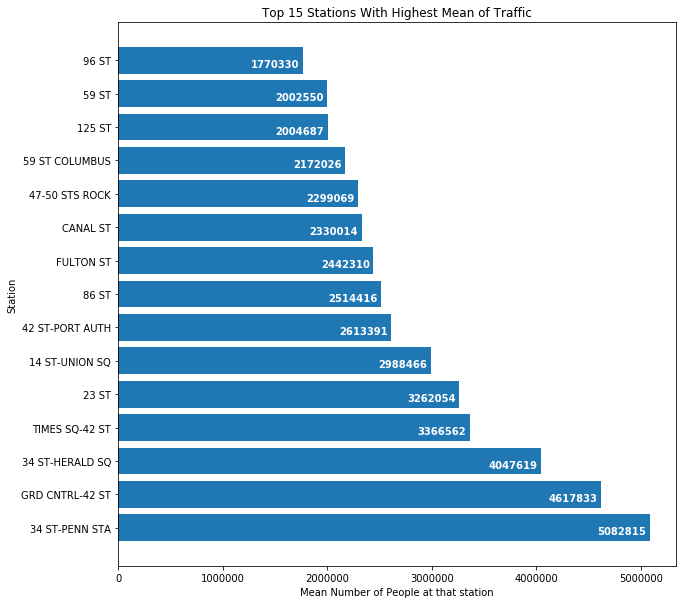

In [13]:
plt.figure(figsize=(10,10))
top_ten_station = station_df[0:15]
plt.barh(top_ten_station['STATION'],top_ten_station['TOTALS'])
plt.xlabel('Mean Number of People at that station')
plt.ylabel('Station')
plt.title('Top 15 Stations With Highest Mean of Traffic')
for i, v in enumerate(top_ten_station['TOTALS']):
    plt.text(v-500000, i-0.2, str(round(v)), color='white', fontweight='bold')

In [18]:
new_df.head(15)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTALS,DATETIME,DATETIME1,WEEKDAY,WEEKDAYNUM,HOUR
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,8:00am - 12:00am,REGULAR,79.0,57.0,136.0,05/25/2019 08:00:00,2019-05-25 08:00:00,Saturday,5,8
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,4:00pm - 8:00pm,REGULAR,274.0,38.0,312.0,05/25/2019 16:00:00,2019-05-25 16:00:00,Saturday,5,16
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,8:00am - 12:00am,REGULAR,73.0,46.0,119.0,05/26/2019 08:00:00,2019-05-26 08:00:00,Sunday,6,8
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,4:00pm - 8:00pm,REGULAR,185.0,36.0,221.0,05/26/2019 16:00:00,2019-05-26 16:00:00,Sunday,6,16
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,8:00am - 12:00am,REGULAR,79.0,51.0,130.0,05/27/2019 08:00:00,2019-05-27 08:00:00,Monday,0,8
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2019,4:00pm - 8:00pm,REGULAR,270.0,35.0,305.0,05/27/2019 16:00:00,2019-05-27 16:00:00,Monday,0,16
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,8:00am - 12:00am,REGULAR,175.0,214.0,389.0,05/28/2019 08:00:00,2019-05-28 08:00:00,Tuesday,1,8
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2019,4:00pm - 8:00pm,REGULAR,730.0,80.0,810.0,05/28/2019 16:00:00,2019-05-28 16:00:00,Tuesday,1,16
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,8:00am - 12:00am,REGULAR,188.0,254.0,442.0,05/29/2019 08:00:00,2019-05-29 08:00:00,Wednesday,2,8
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2019,4:00pm - 8:00pm,REGULAR,740.0,80.0,820.0,05/29/2019 16:00:00,2019-05-29 16:00:00,Wednesday,2,16


In [23]:
mean_totals_df = new_df.groupby(['DATE', 'TIME'])['TOTALS'].agg({'mean'})
mean_totals_df = mean_totals_df.reset_index()
mean_totals_df.head(15)

,DATE,TIME,mean
0,05/25/2019,4:00pm - 8:00pm,319.100837
1,05/25/2019,8:00am - 12:00am,237.934924
2,05/26/2019,4:00pm - 8:00pm,271.144707
3,05/26/2019,8:00am - 12:00am,209.406485
4,05/27/2019,4:00pm - 8:00pm,275.393494
5,05/27/2019,8:00am - 12:00am,204.228005
6,05/28/2019,4:00pm - 8:00pm,618.591179
7,05/28/2019,8:00am - 12:00am,478.840177
8,05/29/2019,4:00pm - 8:00pm,636.619631
9,05/29/2019,8:00am - 12:00am,500.596029


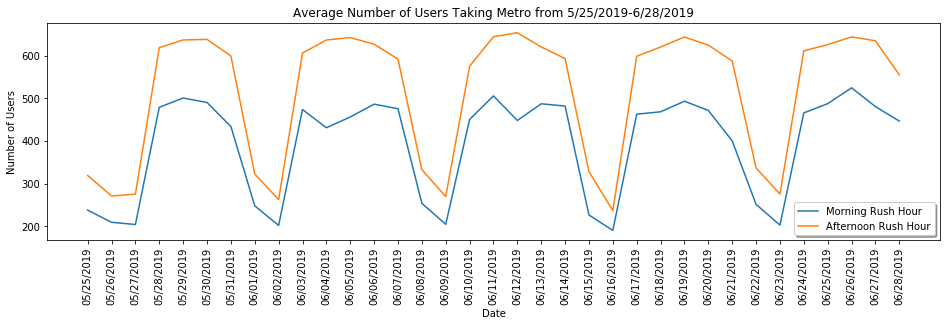

In [24]:
%matplotlib inline

morning_rush_df = mean_totals_df.loc[mean_totals_df['TIME'] == '8:00am - 12:00am']
afternoon_rush_df = mean_totals_df.loc[mean_totals_df['TIME'] == '4:00pm - 8:00pm']

import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(morning_rush_df['DATE'],morning_rush_df['mean'])
plt.plot(afternoon_rush_df ['DATE'],afternoon_rush_df['mean'])
plt.title('Average Number of Users Taking Metro from 5/25/2019-6/28/2019')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.legend(['Morning Rush Hour', 'Afternoon Rush Hour'], shadow = True, loc = 0);

In [25]:
weekday_mean_totals_df = (new_df
                          .groupby(['WEEKDAY', 'TIME', 'WEEKDAYNUM'])['TOTALS']
                          .agg({'mean'}))
weekday_mean_totals_df = weekday_mean_totals_df.reset_index()

weekday_mean_totals_df= weekday_mean_totals_df.sort_values(by=['WEEKDAYNUM'])
weekday_mean_totals_df= weekday_mean_totals_df.drop('WEEKDAYNUM', axis=1)

weekday_mean_totals_df.head(15)

,WEEKDAY,TIME,mean
2,Monday,4:00pm - 8:00pm,533.863340
3,Monday,8:00am - 12:00am,412.420759
10,Tuesday,4:00pm - 8:00pm,629.042131
11,Tuesday,8:00am - 12:00am,473.074887
12,Wednesday,4:00pm - 8:00pm,643.949965
13,Wednesday,8:00am - 12:00am,483.142040
8,Thursday,4:00pm - 8:00pm,628.832509
9,Thursday,8:00am - 12:00am,483.017119
0,Friday,4:00pm - 8:00pm,584.878409
1,Friday,8:00am - 12:00am,445.141517


In [26]:
morning_rush_weekday_df = weekday_mean_totals_df.loc[weekday_mean_totals_df['TIME'] == '8:00am - 12:00am']
morning_rush_weekday_df

,WEEKDAY,TIME,mean
3,Monday,8:00am - 12:00am,412.420759
11,Tuesday,8:00am - 12:00am,473.074887
13,Wednesday,8:00am - 12:00am,483.142040
9,Thursday,8:00am - 12:00am,483.017119
1,Friday,8:00am - 12:00am,445.141517
5,Saturday,8:00am - 12:00am,243.221973
7,Sunday,8:00am - 12:00am,201.827537


In [27]:
afternoon_rush_weekday_df = weekday_mean_totals_df.loc[weekday_mean_totals_df['TIME'] == '4:00pm - 8:00pm']
afternoon_rush_weekday_df

,WEEKDAY,TIME,mean
2,Monday,4:00pm - 8:00pm,533.863340
10,Tuesday,4:00pm - 8:00pm,629.042131
12,Wednesday,4:00pm - 8:00pm,643.949965
8,Thursday,4:00pm - 8:00pm,628.832509
0,Friday,4:00pm - 8:00pm,584.878409
4,Saturday,4:00pm - 8:00pm,327.850081
6,Sunday,4:00pm - 8:00pm,263.137878


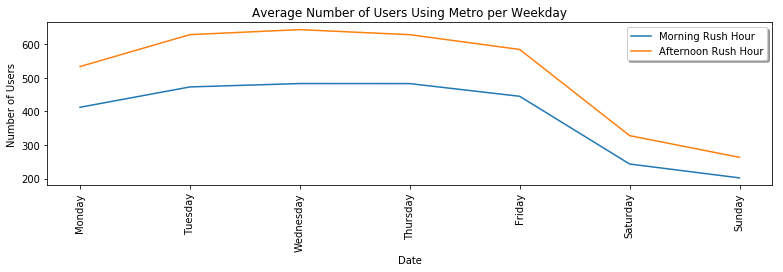

In [28]:
plt.figure(figsize=(13,3))
plt.plot(morning_rush_weekday_df['WEEKDAY'], morning_rush_weekday_df['mean'])
plt.plot(afternoon_rush_weekday_df['WEEKDAY'], afternoon_rush_weekday_df['mean'])
plt.title('Average Number of Users Using Metro per Weekday')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.legend(['Morning Rush Hour', 'Afternoon Rush Hour'], shadow = True, loc = 0)

In [29]:
station_mean_totals_df = new_df.groupby(['STATION', 'DATE', 'TIME'])['TOTALS'].agg({'sum'})
station_mean_totals_df = station_mean_totals_df.reset_index()
station_mean_totals_df = station_mean_totals_df.rename(columns={'sum': 'USERS'})
station_mean_totals_df.head(15)

,STATION,DATE,TIME,USERS
0,1 AV,05/25/2019,4:00pm - 8:00pm,3894.0
1,1 AV,05/25/2019,8:00am - 12:00am,1990.0
2,1 AV,05/26/2019,4:00pm - 8:00pm,3272.0
3,1 AV,05/26/2019,8:00am - 12:00am,1462.0
4,1 AV,05/27/2019,4:00pm - 8:00pm,3185.0
5,1 AV,05/27/2019,8:00am - 12:00am,1722.0
6,1 AV,05/28/2019,4:00pm - 8:00pm,11779.0
7,1 AV,05/28/2019,8:00am - 12:00am,9710.0
8,1 AV,05/29/2019,4:00pm - 8:00pm,13778.0
9,1 AV,05/29/2019,8:00am - 12:00am,10081.0


In [30]:
station_mean_totals_df_morning_rush = station_mean_totals_df.loc[station_mean_totals_df['TIME'] == '8:00am - 12:00am']
station_mean_totals_df_afternoon_rush = station_mean_totals_df.loc[station_mean_totals_df['TIME'] == '4:00pm - 8:00pm']

In [31]:
top_station_means_morning_rush_df = station_mean_totals_df_morning_rush.groupby('STATION')['USERS'].agg({'mean'}).sort_values(by=['mean'], ascending=False).reset_index()
top_station_means_morning_rush_df.head(15)

,STATION,mean
0,34 ST-PENN STA,64339.857143
1,GRD CNTRL-42 ST,56928.971429
2,34 ST-HERALD SQ,46892.657143
3,TIMES SQ-42 ST,39462.657143
4,23 ST,39236.971429
5,14 ST-UNION SQ,35116.057143
6,42 ST-PORT AUTH,33079.142857
7,86 ST,31793.571429
8,FULTON ST,31064.942857
9,47-50 STS ROCK,30739.971429


In [32]:
top_station_means_afternoon_rush_df = station_mean_totals_df_afternoon_rush.groupby('STATION')['USERS'].agg({'mean'}).sort_values(by=['mean'], ascending=False).reset_index()
top_station_means_afternoon_rush_df.head(15)

,STATION,mean
0,34 ST-PENN STA,80883.428571
1,GRD CNTRL-42 ST,75009.114286
2,34 ST-HERALD SQ,68753.600000
3,TIMES SQ-42 ST,56724.828571
4,23 ST,53964.571429
5,14 ST-UNION SQ,50268.685714
6,42 ST-PORT AUTH,41589.171429
7,86 ST,40046.885714
8,FULTON ST,38715.342857
9,CANAL ST,38693.657143


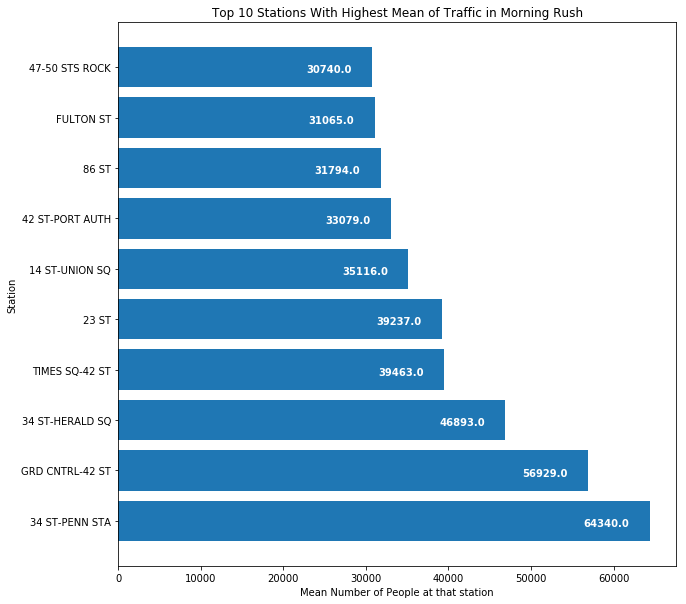

In [33]:
plt.figure(figsize=(10,10))
top_ten_morning_rush_station = top_station_means_morning_rush_df[0:10]
plt.barh(top_ten_morning_rush_station['STATION'],top_ten_morning_rush_station['mean'])
plt.xlabel('Mean Number of People at that station')
plt.ylabel('Station')
plt.title('Top 10 Stations With Highest Mean of Traffic in Morning Rush')
for i, v in enumerate(top_ten_morning_rush_station['mean']):
    plt.text(v-8000, i-0.1, str(np.round(v)), color='white', fontweight='bold')

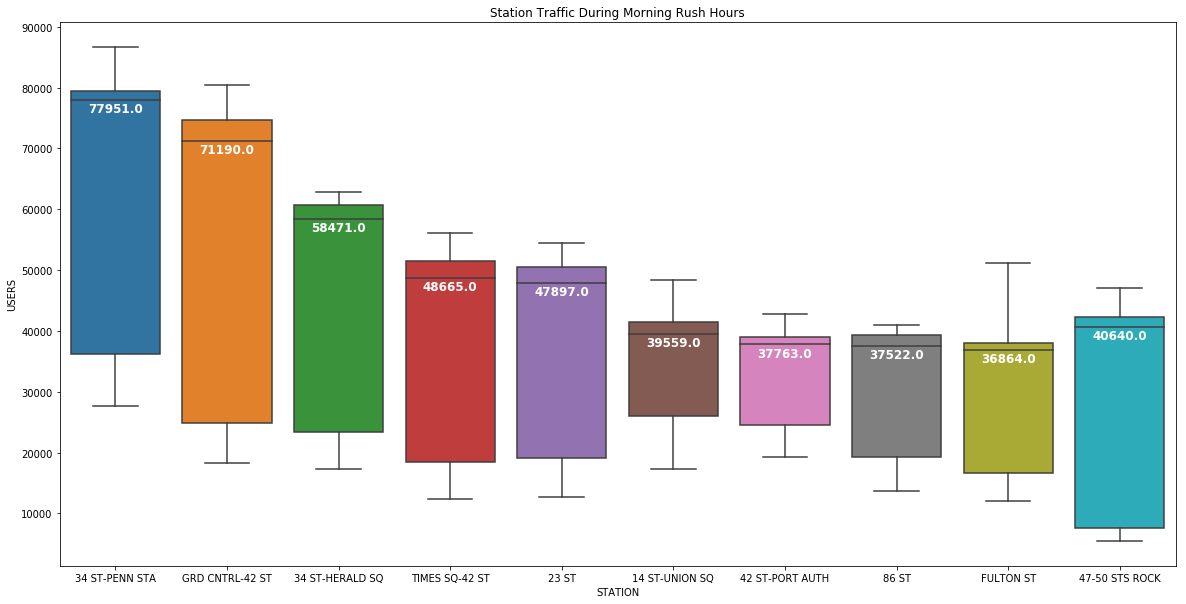

In [34]:
plt.figure(figsize=(20,10))

top_ten_morning_rush_station = station_mean_totals_df_morning_rush.sort_values(by=['USERS'], ascending=False)

#cat = ['YORK ST', '30 AV', '57 ST-7 AV', '34 ST-HERALD SQ', 'HIGH ST' , 'NOSTRAND AV', 'MYRTLE AV', 'HOYT-SCHER',
#       '42 ST-BRYANT PK', 'ASTORIA DITMARS' ]

cat = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '23 ST', '14 ST-UNION SQ', 
       '42 ST-PORT AUTH', '86 ST', 'FULTON ST', '47-50 STS ROCK']

top_ten_morning_rush_station = top_ten_morning_rush_station.loc[top_ten_morning_rush_station['STATION'].isin(cat)]
top_ten_morning_rush_station.sort_values

ax = sns.boxplot(top_ten_morning_rush_station['STATION'],top_ten_morning_rush_station['USERS'], order=cat)
ax.set_title('Station Traffic During Morning Rush Hours')

medians = top_ten_morning_rush_station.groupby(['STATION'])['USERS'].median()
median_labels = [str(np.round(s)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[label.get_text()]-2000, str(np.round(medians[label.get_text()])), 
            horizontalalignment='center', size='large', color='w', weight='semibold')

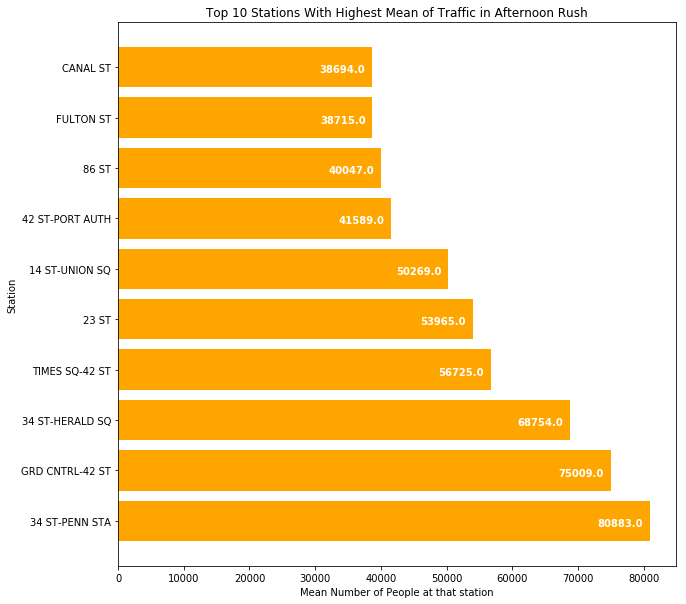

In [35]:
plt.figure(figsize=(10,10))
top_ten_afternoon_rush_station = top_station_means_afternoon_rush_df[0:10]
plt.barh(top_ten_afternoon_rush_station['STATION'],top_ten_afternoon_rush_station['mean'], color='orange')
plt.xlabel('Mean Number of People at that station')
plt.ylabel('Station')
plt.title('Top 10 Stations With Highest Mean of Traffic in Afternoon Rush')
for i, v in enumerate(top_ten_afternoon_rush_station['mean']):
    plt.text(v-8000, i-0.1, str(np.round(v)), color='white', fontweight='bold')

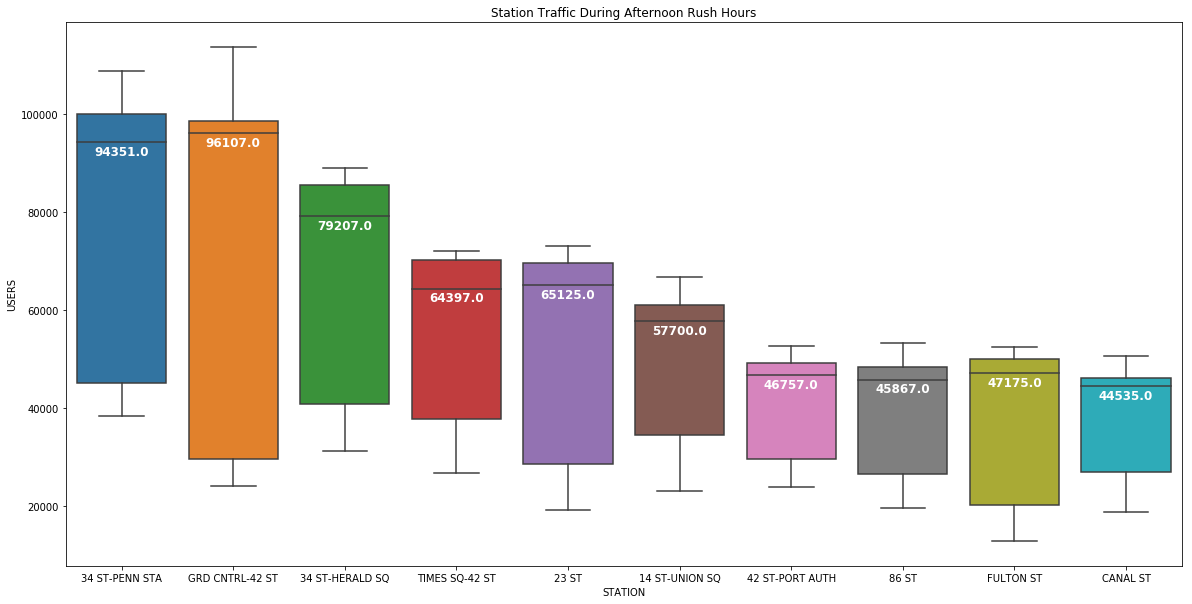

In [36]:
plt.figure(figsize=(20,10))

top_ten_afternoon_rush_station = station_mean_totals_df_afternoon_rush.sort_values(by=['USERS'], ascending=False)

#cat = ['YORK ST', '57 ST-7 AV', '34 ST-HERALD SQ', '14 ST-UNION SQ', '42 ST-BRYANT PK', 'W 4 ST-WASH SQ', 'GRD CNTRL-42 ST',
#      'HOYT-SCHER', 'TIMES SQ-42 ST', 'HIGH ST']

cat = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '23 ST', '14 ST-UNION SQ', 
       '42 ST-PORT AUTH', '86 ST', 'FULTON ST', 'CANAL ST']

top_ten_afternoon_rush_station = top_ten_afternoon_rush_station.loc[top_ten_afternoon_rush_station['STATION'].isin(cat)]

ax = sns.boxplot(top_ten_afternoon_rush_station['STATION'],top_ten_afternoon_rush_station['USERS'], order=cat)
ax.set_title('Station Traffic During Afternoon Rush Hours')

medians = top_ten_afternoon_rush_station.groupby(['STATION'])['USERS'].median()
median_labels = [str(np.round(s)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    plt.text(pos[tick], medians[label.get_text()]-2600, str(np.round(medians[label.get_text()])), 
            horizontalalignment='center', size='large', color='w', weight='semibold')